# CSC8001: Assignment 2
## Part B [50 marks]

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

## B1: Fuel efficiency [25 total marks]
For this problem we're going to use the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Auto MPG Data set to explore the association between a car's horsepower and its fuel efficiency.

### B1.1 Load data [5 marks]
For the `b11()` function below: load the Auto MPG data into a Data Frame, clean data as required, and return the Data Frame. 

The `auto-mpg.data` data file and its data description, `auto-mpg.names`, are available in the assignment data folder.  Be sure to read the data description file.  Use the `Attribute` names provided in `auto-mpg.names` for your Data Frame's column names.  For two word attribute names use the 2nd word: `year` for `model year` and `name` for `car name`.

In [192]:
def b11():
    """ function reads data from the auto-mpg.data file into a dataframe and cleans it. Returns data in a dataframe called 'df'.
    """
    
    # Read the data into a dataframe called 'df'
    d = pd.read_csv('data/auto-mpg.data', sep='\s+')
    df = pd.DataFrame(data=d)
    df.columns = ['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration','origin', 'year', 'name']
    
    # Clean the data
    df.mpg = df.mpg.apply(pd.to_numeric, errors='coerce') # Convert mpg to numeric values.
    df.horsepower = df.horsepower.apply(pd.to_numeric, errors='coerce') # convert horsepower to numeric values.
    df.fillna(0, inplace=True) # replace NaN with 0.
    
    return(df);

In [193]:
auto = b11()
auto.shape

(397, 9)

### B1.2 Multi-axes histogram chart [10 marks]
To help us explore the association between a car's horsepower and its fuel efficiency, create a multi-axes histogram chart plotting `horsepower` vs `mpg`. 

The `b12()` function should:
- call the `b11()` function to retrieve the auto-mpg Data Frame  
- use `seaborn-whitegrid` style, just for this b12 plot  
- create a plot similar to the one shown below

*Hint: Review the PyDSHB notebooks: 04.11 Settings and Stylesheets and 04.08 Multiple Subplots*.

<img src="b12.PNG" width=488 height=375 align=left />

In [196]:
def b12():
    """ function uses data from the b11 function to create a multi-axes chart with mpg plotted against hp as a scatter plot
        and two histograms for mpg and fuel efficiency distributed on either axis.
    """
    
    # Load the data
    plt.style.use('seaborn-whitegrid')
    data = b11()
    x = data['horsepower']
    y = data['mpg']
    
    # Set up the figure space with gridspec
    fig = plt.figure(figsize=(8, 8))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
    
    # Set up the main axes
    main_ax = fig.add_subplot(grid[1:3, 0:3])
    main_ax.set_xlim(35,240)
    main_ax.set_ylim(5,50)
    main_ax.set_xlabel('Horsepower')
    main_ax.set_ylabel('Miles Per Gallon [mpg]')
    
    # Style the main axis
    main_ax.plot(x, y, 'ok', markersize=3, alpha=0.4, color='#1f77b4')
    
    # Set up the y axis subplot
    y_hist = fig.add_subplot(grid[0, 0:3], yticklabels=[], sharex=main_ax)
    y_hist.set_title('Fuel Efficiency: Horsepower vs Miles Per Gallon')
    y_hist.set_xlim(35,240)
    
    # Set up the x axis subplot
    x_hist = fig.add_subplot(grid[1:3, 3], xticklabels=[], sharey=main_ax)
    x_hist.set_xlabel('mpg')
    x_hist.xaxis.set_label_position("top")
    
    # Add Histogram on the attached axes
    x_hist.hist(y, 20, histtype='stepfilled',
                orientation='horizontal', color='#1f77b4')
    
    y_hist.hist(x, 25, histtype='stepfilled',
                orientation='vertical', color='#1f77b4')


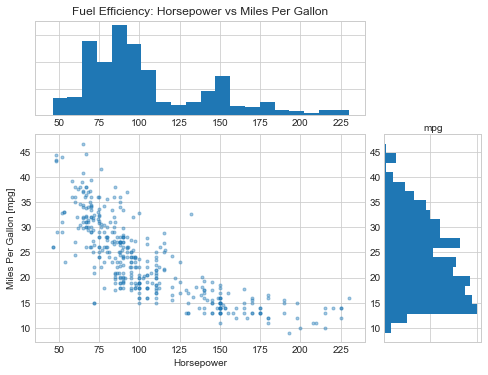

In [197]:
b12()

### B1.3: Two-dimensional histogram [10marks]
Continuing our explorations into the association between a car's horsepower and its fuel effiecincy:

The `b13()` function should:
- call the `b11()` function to retrieve the auto-mpg Data Frame 
- use Matplotlib's `hist2d()` function to generate a two-dimensional histogram of `mpg` vs `horsepower`.  

Additional plot criteria:
  - Plot `horsepower` on the horizontal axis and `mpg` along the vertical axis.
  - Figure size: 10 by 5
  - 25 bins
  - Plot range values for horsepower between 40 and 235, and mpg between 5 and 50.
   - Colorbar with an appropriate color map
   - Appropriate labels


In [204]:
def b13():
    """ function reads data using the b11 function before using matplotlibs 2 dimensional histogram to
        display number of cars with various mpg/hp ratios.
    """    
    
    # Load the data
    data = b11()
    hpVar = data['horsepower']
    mpgVar = data['mpg']
    
    # Prepare the plot space
    fig = plt.figure(figsize=(10, 5))
    plt.xlabel('Horse power [hp]')
    plt.ylabel('Miles per gallon [mpg]')
    plt.title('Fuel Efficiency: Horsepower vs Miles Per Gallon')
    
    # Generate a 2-D histogram
    plt.hist2d(hpVar, mpgVar, cmap=plt.cm.viridis, bins=(25), 
           range=((40,235), (5, 50)))
    
    plt.colorbar(label='Number of Cars')
      
    

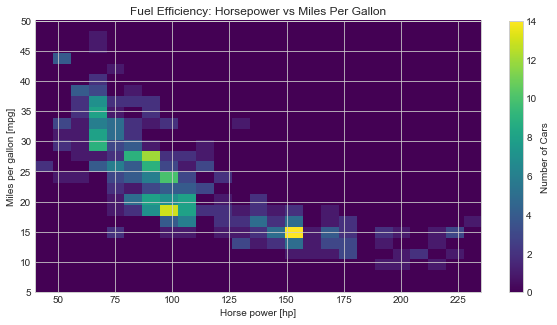

In [205]:
b13()

## B2: Birthdays [25 total marks]
For this problem we will be analysing and visualising U.S. birth data as an homage to Matt Stiles's ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/) article.  Our chart will use the  birth data gathered by [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/births) [[CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)]: 

There are two birth data files, both available in the assignment `data` folder:

- `US_births_1994-2003_CDC_NCHS.csv`: <br>
   Births from 1994 to 2003 (Centers for Disease Control and   Prevention's National Center for Health Statistics)

- `US_births_2000-2014_SSA.csv`: <br>
   Births from 2000 to 2014 (Social Security Administration)

Both files have the following structure:

| year |	month |	date_of_month |	day_of_week	 | births |
|:---|:---|:---|:---|:---|
| 1994 |	1 |	1 |	6 |	8096 |
 |1994 |	1 |	2 |	7 |	7772 |
 |1994 |	1 |	3 |	1 |	10142 |
 |1994 |	1 |	4 |	2 |	11248 |


### B2.1 Load data [10 marks]
Complete the `b21()` function below which should provide the following functionality:
- Load data from the two files into one Data Frame and clean as required.
- Return a Data Frame with multiple indexes for `month` and `date_of_month` and a `births` column which has the average daily births from 1994-2014. See `b21().tail()` output below. *Hint: Review the PyDSHB notebook: *03.05 Hierarchical Indexing*.

<img src="b21.PNG" width=221 height=199 align=left />


In [206]:
def b21():
    """ function loads data from two csv files, before joining and returning them as a dataframe called birth_df.
    """
    
    # Load and merge the data
    us_births_1 = pd.read_csv('data/US_births_1994-2003_CDC_NCHS.csv')
    us_births_2 = pd.read_csv('data/US_births_2000-2014_SSA.csv')
    joinerVar = [us_births_1, us_births_2]
    birth_df = pd.concat(joinerVar)
    
    # Load the multiple indices
    birth_df = birth_df.groupby(['month', 'date_of_month'], as_index=True).births.mean()
    birth_df = pd.DataFrame(birth_df) # convert back to a dataframe
        
    return(birth_df);
    

In [207]:
b21().tail()

births
month date_of_month          
12    27             11792.48
      28             11758.76
      29             11815.84
      30             11791.08
      31             10462.12

### B2.2 Plot data [15 marks]
Create a heatmap style plot similar to the one shown below from Matt Stiles's article: ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/). *HINT: You may find these resources helpful: [Creating annotated heatmaps](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py) and PyDSHB: 04.07 Customizing Colorbars*

Additional criteria:
 - Use `b21()` function to load data 
 - Add appropriate labels. 
   - X-axis labels should be on the top of the plot.
 - Distribution of average daily births per month/day should be similar to article's.
 - For the color bar select the appropriate discrete values and color limits. Indicate out-of-bounds values with a triangular arrow.
    - Do not need to duplicate article's color map or colorbar placement. 


<img src="b22.PNG" width=738 height=343 align=left/> <br>

In [208]:
def b22():
    """ function loads data using b21() function then creates a heatmap of number of births per day of a given month using it.
    """
    
    # Load the data into the plot
    data_df = b21()
    unstacked_df = data_df.unstack().fillna(0)
    fig, ax = plt.subplots()
    
    # Style the plot
    heatmap = ax.pcolor(unstacked_df, cmap=plt.cm.viridis,
                        vmin=9000, vmax=12000) # Viridis is chosen as it is a great colour map that is dark to light.
    fig.set_size_inches(14, 7)
    
    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(unstacked_df.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(unstacked_df.shape[0]) + 0.5, minor=False)
    ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
                        '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'])
    ax.set_yticklabels(['Jan.', 'Feb.', 'March', 'April', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.'])
    ax.xaxis.tick_top()
    ax.invert_yaxis()
    
    # Style the colourbar
    cbar = plt.colorbar(heatmap, ax=ax, shrink=0.25, orientation='horizontal', ticks=[9000, 10500, 12000],
                        label='U.S. Average Daily Births: 1994-2014')
    cbar.ax.set_xticklabels(['< 9k', '11k', '> 12K']) # label the color bar
    cbar.ax.xaxis.set_label_position('top')
    
    """ its worth noting that the example colour bar is wrong in its design, the central value bewtween 9000 and 12000 is
        10500 not 11k. I have designed my colour bar in line with the example, even though I acknowledge it should not be 11k
        in the middle but rather 10.5k.
    """
    

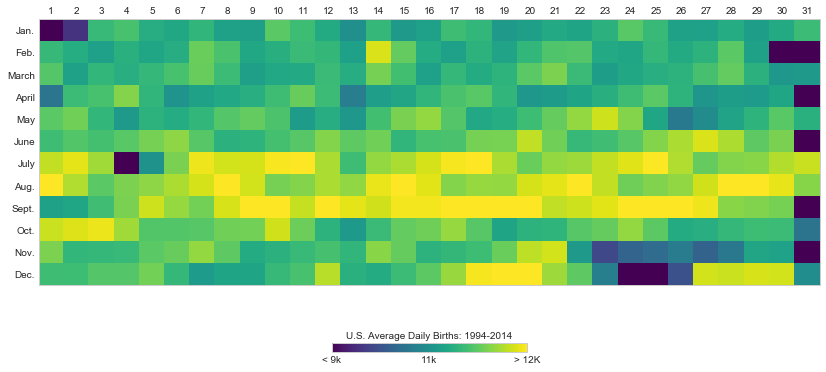

In [209]:
b22()


---------------- **End of Part B** ---------------------


Parts of this assignment were based on/adapted from:
- "Some People Are Too Superstitious To Have A Baby On Friday The 13th", [FiveThirtyEight](https://fivethirtyeight.com/features/some-people-are-too-superstitious-to-have-a-baby-on-friday-the-13th/), 13 May 2016.
- "How Common is Your Birthday", [The Daily Viz](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/), Matt Stiles, September 17, 2016